In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset
df=pd.read_csv("/Users/meenu/entri/myexcel.csv")
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [7]:
#Preprocessing
np.random.seed(42)
df['Height']=np.random.randint(150,181,size=len(df))
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,156,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,169,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,178,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,164,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,160,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,168,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,153,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,152,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,166,231,Kansas,947276.0


In [13]:
#Analysis Task 1:Team Distribution
team_distribution=df['Team'].value_counts()
team_percentage=round((team_distribution/len(df))*100,2)
team_df=pd.DataFrame({"Employee Count": team_distribution,"Percentage": team_percentage})
team_df

,Employee Count,Percentage
Team,,
New Orleans Pelicans,19,4.15
Memphis Grizzlies,18,3.93
Utah Jazz,16,3.49
New York Knicks,16,3.49
Milwaukee Bucks,16,3.49
Brooklyn Nets,15,3.28
Portland Trail Blazers,15,3.28
Oklahoma City Thunder,15,3.28
Denver Nuggets,15,3.28


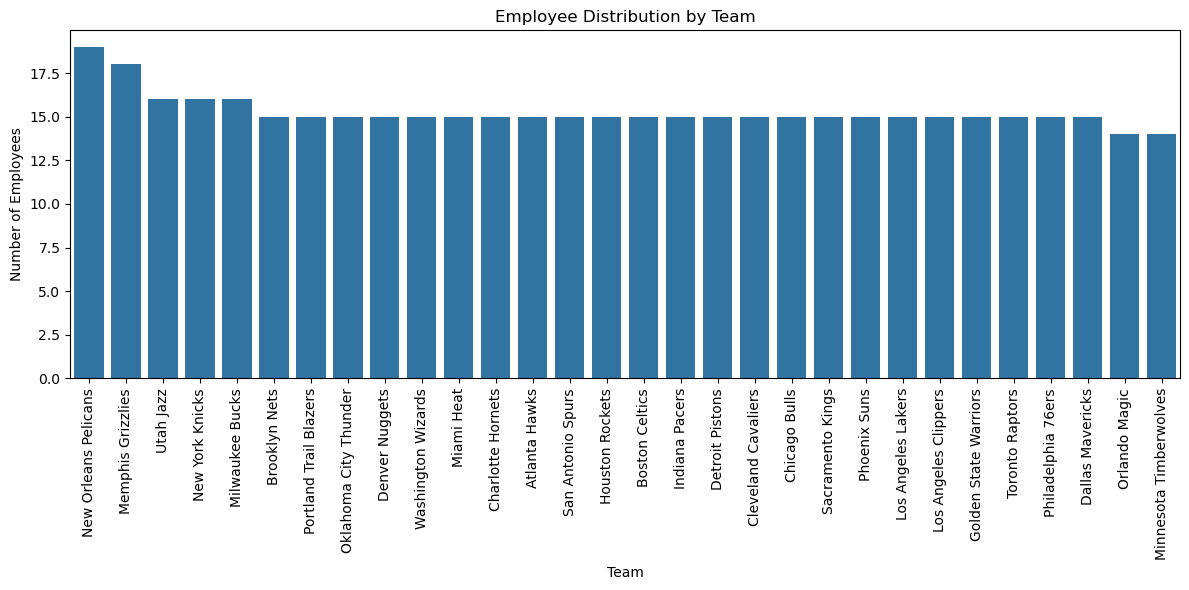

In [39]:
#Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(x=team_df.index,y=team_distribution.values)
plt.xticks(rotation=90)
plt.title('Employee Distribution by Team')
plt.ylabel('Number of Employees')
plt.xlabel('Team')
plt.tight_layout()
plt.show()

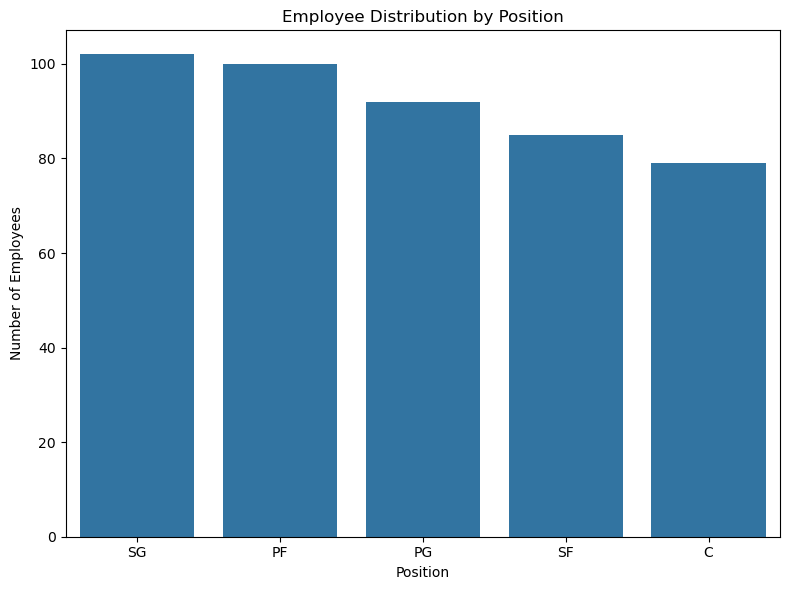

In [23]:
#Analysis Task 2:Position segregation
position_distribution=df['Position'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=position_distribution.index,y=position_distribution.values)
plt.title('Employee Distribution by Position')
plt.ylabel('Number of Employees')
plt.xlabel('Position')
plt.tight_layout()
plt.show()

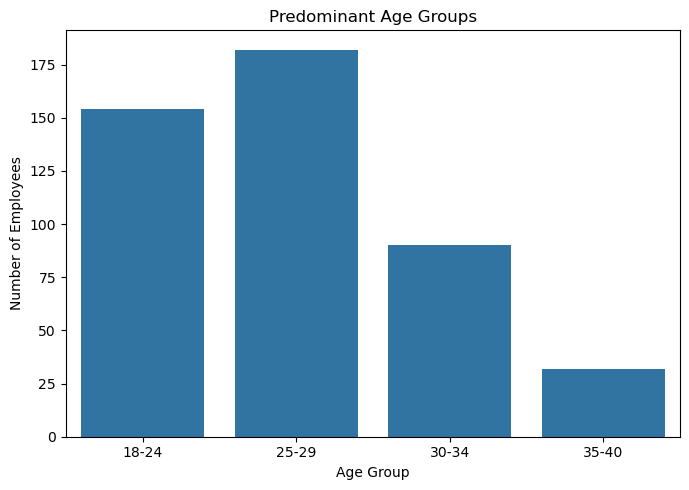

In [35]:
#Analysis Task 3:Predominant Age group
bins=[18,24,29,34,40]
labels=['18-24','25-29','30-34','35-40']
df['AgeGroup']=pd.cut(df['Age'],bins=bins,labels=labels)
age_group_counts=df['AgeGroup'].value_counts().sort_index()
plt.figure(figsize=(7,5))
sns.barplot(x=age_group_counts.index,y=age_group_counts.values)
plt.title('Predominant Age Groups')
plt.ylabel('Number of Employees')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

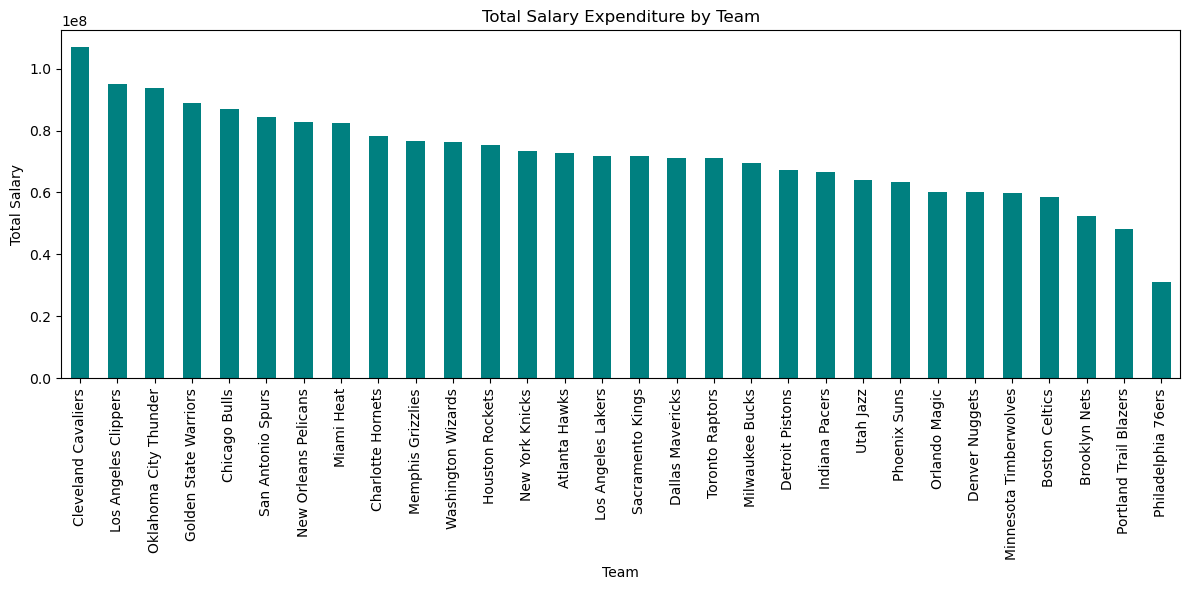

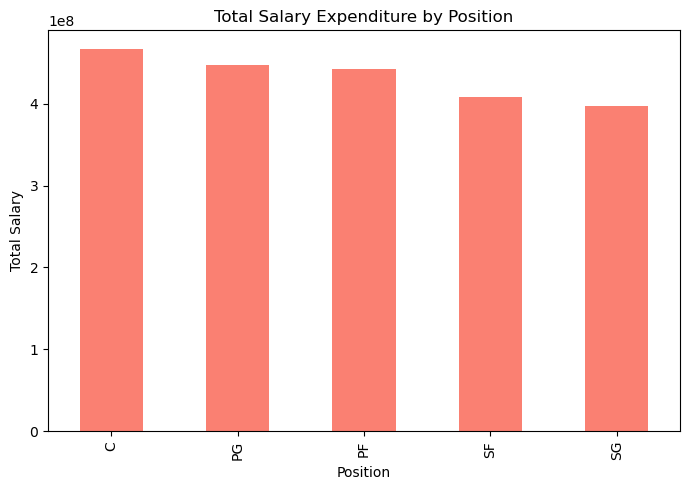

In [29]:
#Analysis Task 4:Highest Salary Expenditure
df_salary=df.dropna(subset=['Salary'])
salary_by_team=df_salary.groupby('Team')['Salary'].sum().sort_values(ascending=False)
salary_by_position=df_salary.groupby('Position')['Salary'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
salary_by_team.plot(kind='bar',color='teal')
plt.title('Total Salary Expenditure by Team')
plt.ylabel('Total Salary')
plt.tight_layout()
plt.show()
plt.figure(figsize=(7,5))
salary_by_position.plot(kind='bar',color='salmon')
plt.title('Total Salary Expenditure by Position')
plt.ylabel('Total Salary')
plt.tight_layout()
plt.show()

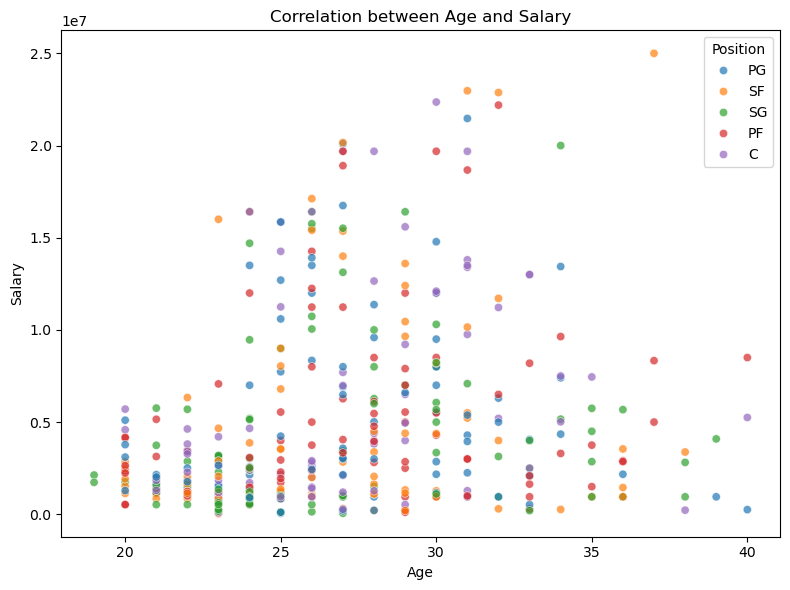

Correlation between Age and Salary:0.21


In [37]:
#Analysis Task 5:Age vs Salary correlation
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age',y='Salary',data=df_salary,hue='Position',palette='tab10',alpha=0.7)
plt.title('Correlation between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()
correlation=df_salary['Age'].corr(df_salary['Salary'])
print(f"Correlation between Age and Salary:{correlation:.2f}")